# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\aser\AppData\Local\Temp\pip-install-vwauvdyh\tensorflow-gpu_91c107abe5c84f02bff8de435276d423\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     --------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
     --------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
     --------------------------------------- 0.1/38.8 MB 327.3 kB/s eta 0:01:59
     --------------------------------------- 0.1/38.8 MB 514.3 kB/s eta 0:01:16
     ---------------

### 1.2 Collect Images Using OpenCV

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [3]:
cap = cv2.VideoCapture(1)  # 0 is usually the default camera
if not cap.isOpened():
    print("Error: Camera not accessible")


In [6]:
cap = cv2.VideoCapture(1)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [7]:
!labelme

2024-08-12 17:19:33,113 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\aser\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2.3 Load Image into TF Data Pipeline

In [11]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [12]:
images.as_numpy_iterator().next()

b'data\\images\\edabd7bf-58bd-11ef-9662-2cf05d6ab122.jpg'

In [13]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [14]:
images = images.map(load_image)

In [15]:
images.as_numpy_iterator().next()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Raw Images with Matplotlib

In [17]:
image_generator = images.batch(4).as_numpy_iterator()

In [18]:
plot_images = image_generator.next()

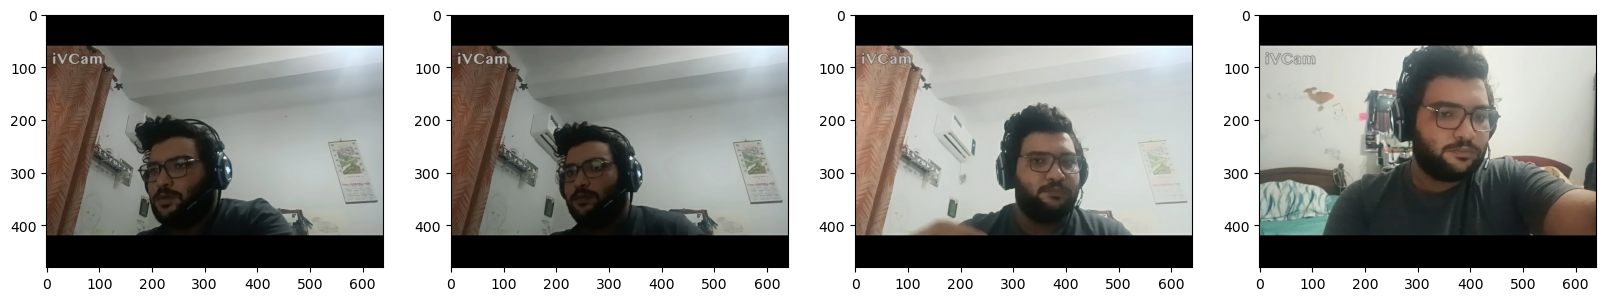

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [20]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [21]:
import albumentations as alb

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.13 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [22]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [25]:
img = cv2.imread(os.path.join('data','train', 'images','cd0f2e76-58bd-11ef-8153-2cf05d6ab122.jpg'))

In [28]:
with open(os.path.join('data', 'train', 'labels', 'cd0f2e76-58bd-11ef-8153-2cf05d6ab122.json'), 'r') as f:
    label = json.load(f)

In [29]:
label['shapes'][0]['points']

[[193.78378378378378, 235.67567567567568],
 [311.62162162162156, 401.08108108108104]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [30]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [31]:
coords

[193.78378378378378,
 235.67567567567568,
 311.62162162162156,
 401.08108108108104]

In [32]:
coords = list(np.divide(coords, [640,480,640,480]))

In [33]:
coords

[0.30278716216216217,
 0.49099099099099097,
 0.48690878378378366,
 0.8355855855855855]

### 4.4 Apply Augmentations and View Results

In [34]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [35]:
augmented['bboxes'][0][2:]

(0.48360360360360344, 0.889069069069069)

In [36]:
augmented['bboxes']

[(0.2217417417417418,
  0.5215015015015015,
  0.48360360360360344,
  0.889069069069069)]

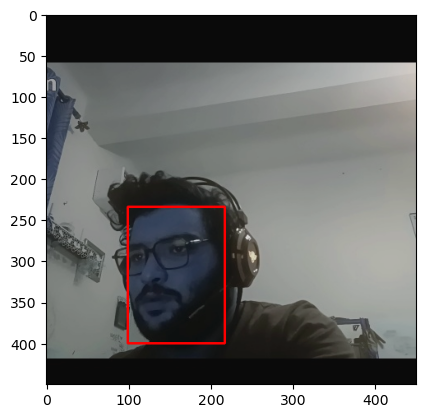

In [37]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [39]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.590793918918919, 0.543918918918919, 0.38048986486486486, 0.17680180180180177, 'face'].
x_max is less than or equal to x_min for bbox [0.6803209459459459, 0.16328828828828829, 0.41680743243243246, 0.545045045045045, 'face'].
x_max is less than or equal to x_min for bbox [0.6828547297297296, 0.15427927927927926, 0.3838682432432432, 0.6069819819819819, 'face'].
x_max is less than or equal to x_min for bbox [0.636402027027027, 0.24887387387387386, 0.39907094594594594, 0.6509009009009008, 'face'].
x_max is less than or equal to x_min for bbox [0.6262668918918919, 0.2286036036036036, 0.3973817567567567, 0.6441441441441441, 'face'].
x_max is less than or equal to x_min for bbox [0.5384290540540541, 0.28153153153153154, 0.30701013513513514, 0.6734234234234234, 'face'].


### 5.2 Load Augmented Images to Tensorflow Dataset

In [44]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [45]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [46]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [47]:
train_images.as_numpy_iterator().next()

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [48]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [49]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [50]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [51]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [52]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3987, 0.1398, 0.6606, 0.5073], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [53]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 420, 420)

### 7.2 Create Final Datasets (Images/Labels)

In [67]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [68]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [69]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [70]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3628 , 0.4434 , 0.699  , 0.799  ],
        [0.3684 , 0.1014 , 0.6567 , 0.4197 ],
        [0.2874 , 0.3694 , 0.666  , 0.778  ],
        [0.2499 , 0.36   , 0.5684 , 0.707  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.07385, 0.1315 , 0.332  , 0.4653 ],
        [0.4211 , 0.3264 , 0.7285 , 0.678  ],
        [0.4429 , 0.1327 , 0.8213 , 0.6685 ]], dtype=float16))

### 7.3 View Images and Annotations

In [71]:
data_samples = train.as_numpy_iterator()

In [72]:
res = data_samples.next()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


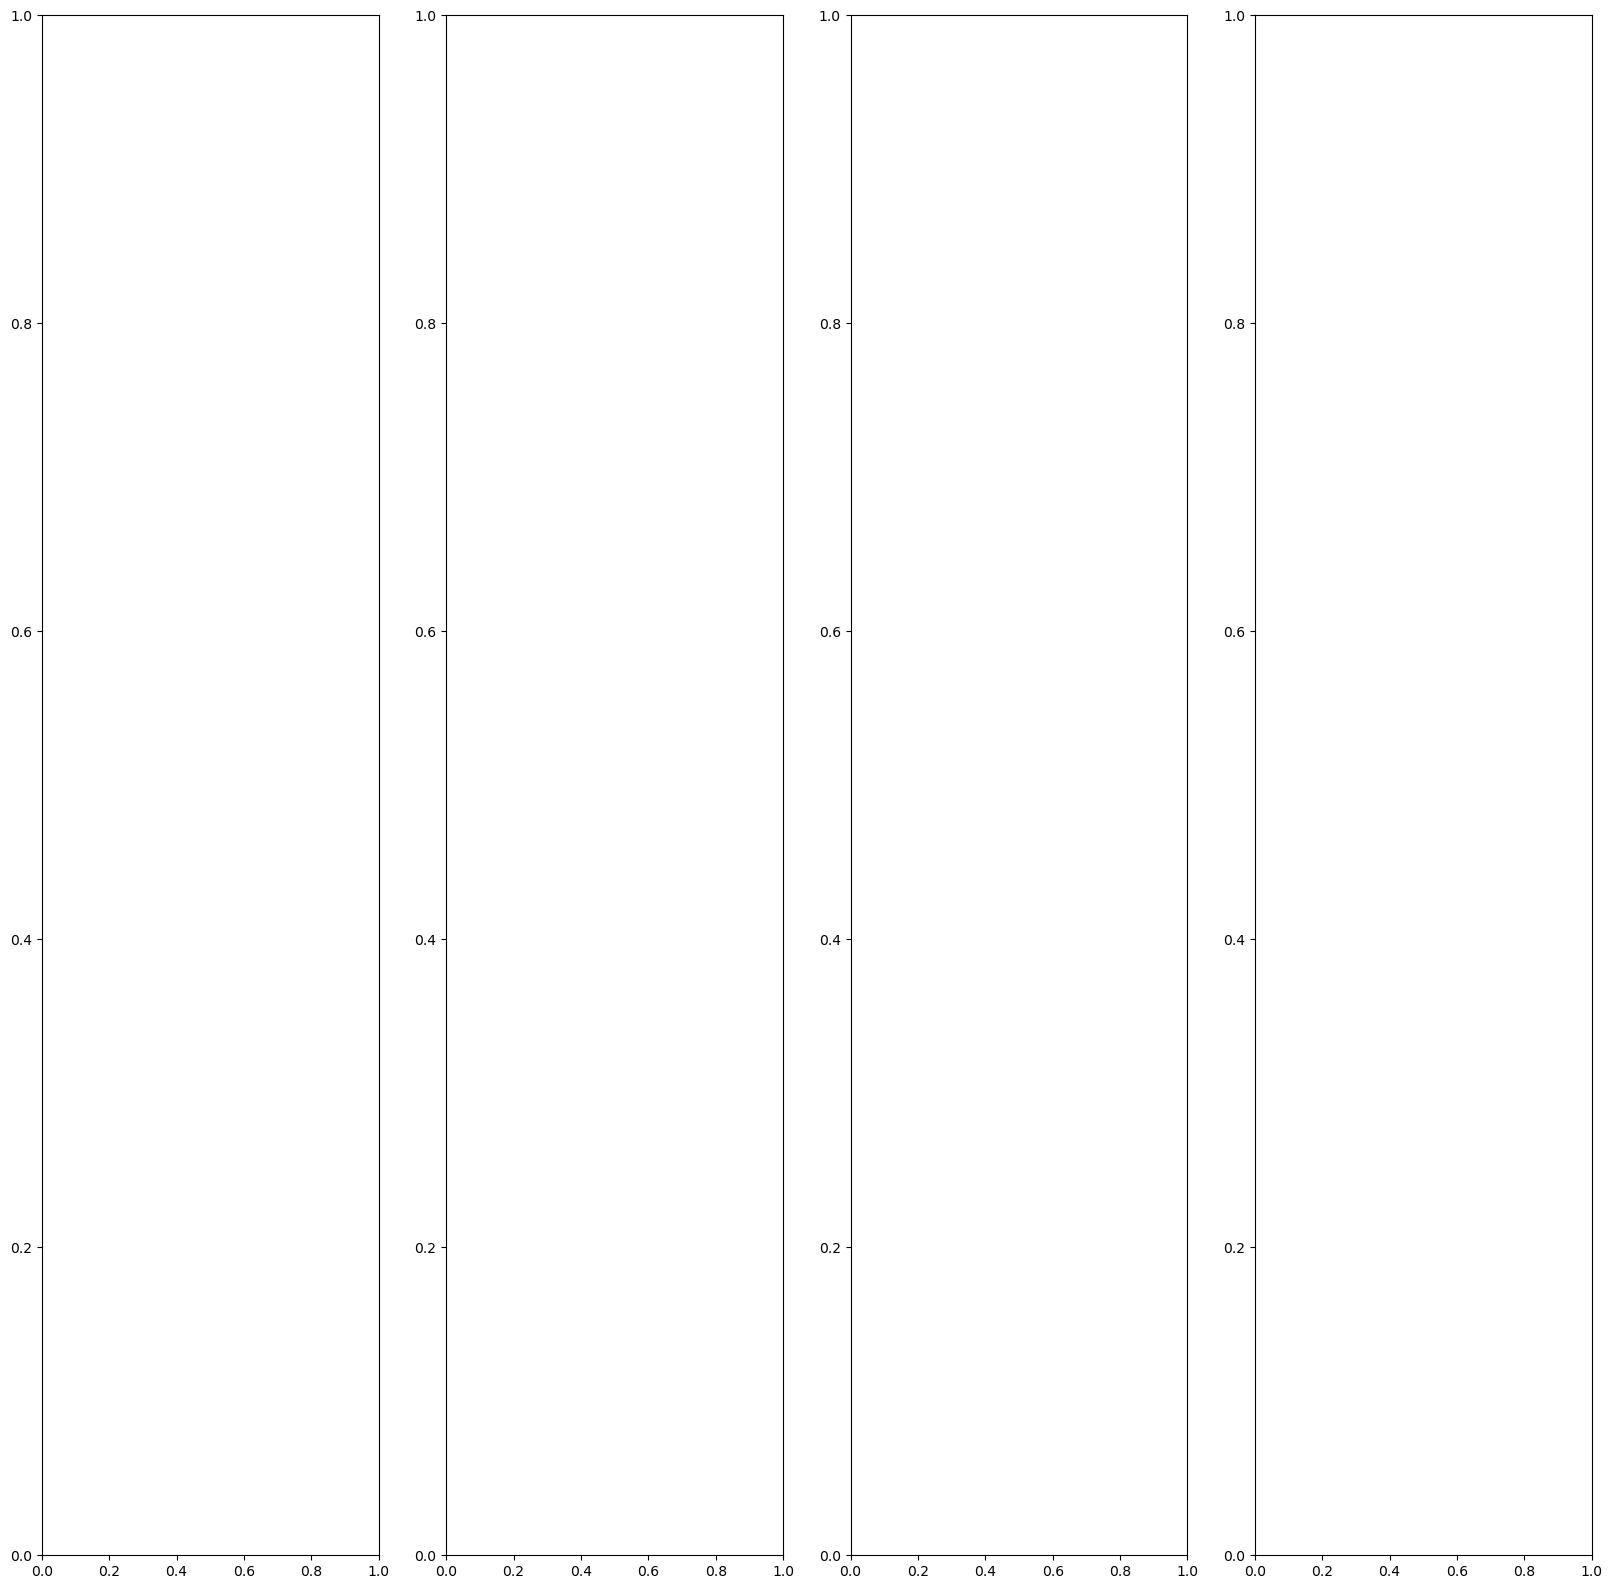

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [75]:
vgg = VGG16(include_top=False)

In [76]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [77]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [78]:
facetracker = build_model()

In [79]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [80]:
X, y = train.as_numpy_iterator().next()

In [81]:
X.shape

(8, 120, 120, 3)

In [82]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 11s 11s/step


In [83]:
classes, coords

(array([[0.41406882],
        [0.33723778],
        [0.4416132 ],
        [0.35281017],
        [0.44777003],
        [0.40534768],
        [0.4126929 ],
        [0.3755642 ]], dtype=float32),
 array([[0.7281375 , 0.5587111 , 0.4647396 , 0.5592458 ],
        [0.6201812 , 0.4431434 , 0.53651613, 0.58373046],
        [0.63177854, 0.44325668, 0.5767142 , 0.5704051 ],
        [0.624633  , 0.5239185 , 0.54473627, 0.5398576 ],
        [0.7080945 , 0.5034073 , 0.5442496 , 0.5662094 ],
        [0.65758073, 0.4963885 , 0.5495264 , 0.5586771 ],
        [0.7285696 , 0.50908303, 0.55826527, 0.613645  ],
        [0.7602074 , 0.5568024 , 0.59549105, 0.5628005 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [84]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [85]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [86]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [87]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [88]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.2673125>

In [89]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.764545>

In [90]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.2673125>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [91]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [92]:
model = FaceTracker(facetracker)

In [93]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [94]:
logdir='logs'

In [95]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [96]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
473/473 [==============================] - 106s 185ms/step - total_loss: 0.3026 - class_loss: 0.1060 - regress_loss: 0.2496 - val_total_loss: 0.0234 - val_class_loss: 0.0039 - val_regress_loss: 0.0215
Epoch 2/50
473/473 [==============================] - 149s 294ms/step - total_loss: 0.0697 - class_loss: 0.0207 - regress_loss: 0.0594 - val_total_loss: 0.0266 - val_class_loss: 0.0016 - val_regress_loss: 0.0258
Epoch 3/50
473/473 [==============================] - 265s 535ms/step - total_loss: 0.0261 - class_loss: 0.0071 - regress_loss: 0.0226 - val_total_loss: 0.0101 - val_class_loss: 1.7310e-04 - val_regress_loss: 0.0100
Epoch 4/50
473/473 [==============================] - 392s 805ms/step - total_loss: 0.0159 - class_loss: 0.0028 - regress_loss: 0.0145 - val_total_loss: 0.0113 - val_class_loss: 6.7204e-06 - val_regress_loss: 0.0113
Epoch 5/50
473/473 [==============================] - 384s 787ms/step - total_loss: 0.0204 - class_loss: 0.0039 - regress_loss: 0.0184 - val_tot

### 10.3 Plot Performance

In [97]:
hist.history

{'total_loss': [0.07353407144546509,
  0.014365360140800476,
  0.008592517115175724,
  0.0028157883789390326,
  0.007615744601935148,
  0.006541541777551174,
  0.0017612278461456299,
  0.00038590491749346256,
  0.0036077876575291157,
  0.001210582908242941,
  0.001013830304145813,
  0.0006457310519181192,
  0.0019265899900346994,
  0.0011249490780755877,
  0.00021199521142989397,
  0.0008053209166973829,
  0.00030197855085134506,
  0.005741672124713659,
  0.00018904937314800918,
  0.00023911094467621297,
  0.0006626438698731363,
  0.0002193151885876432,
  0.0004292182857170701,
  0.00027759981458075345,
  0.0005762491491623223,
  0.0003603299264796078,
  0.00018328512669540942,
  0.00035495369229465723,
  0.0007041236967779696,
  0.00010418804595246911,
  0.0002819111687131226,
  8.669317321619019e-05,
  7.852280396036804e-05,
  0.00017978710820898414,
  0.00016750000941101462,
  0.00016124930698424578,
  4.837910819333047e-05,
  5.267399683361873e-05,
  0.000357306853402406,
  5.04916

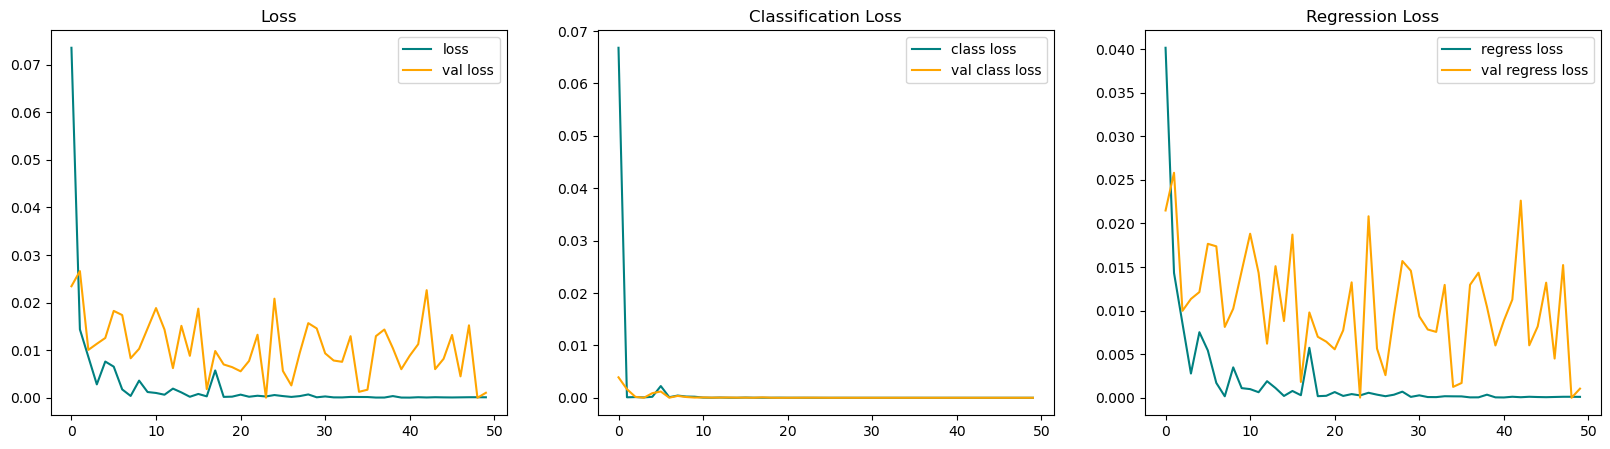

In [98]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [99]:
test_data = test.as_numpy_iterator()

In [100]:
test_sample = test_data.next()

In [101]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 27ms/step


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


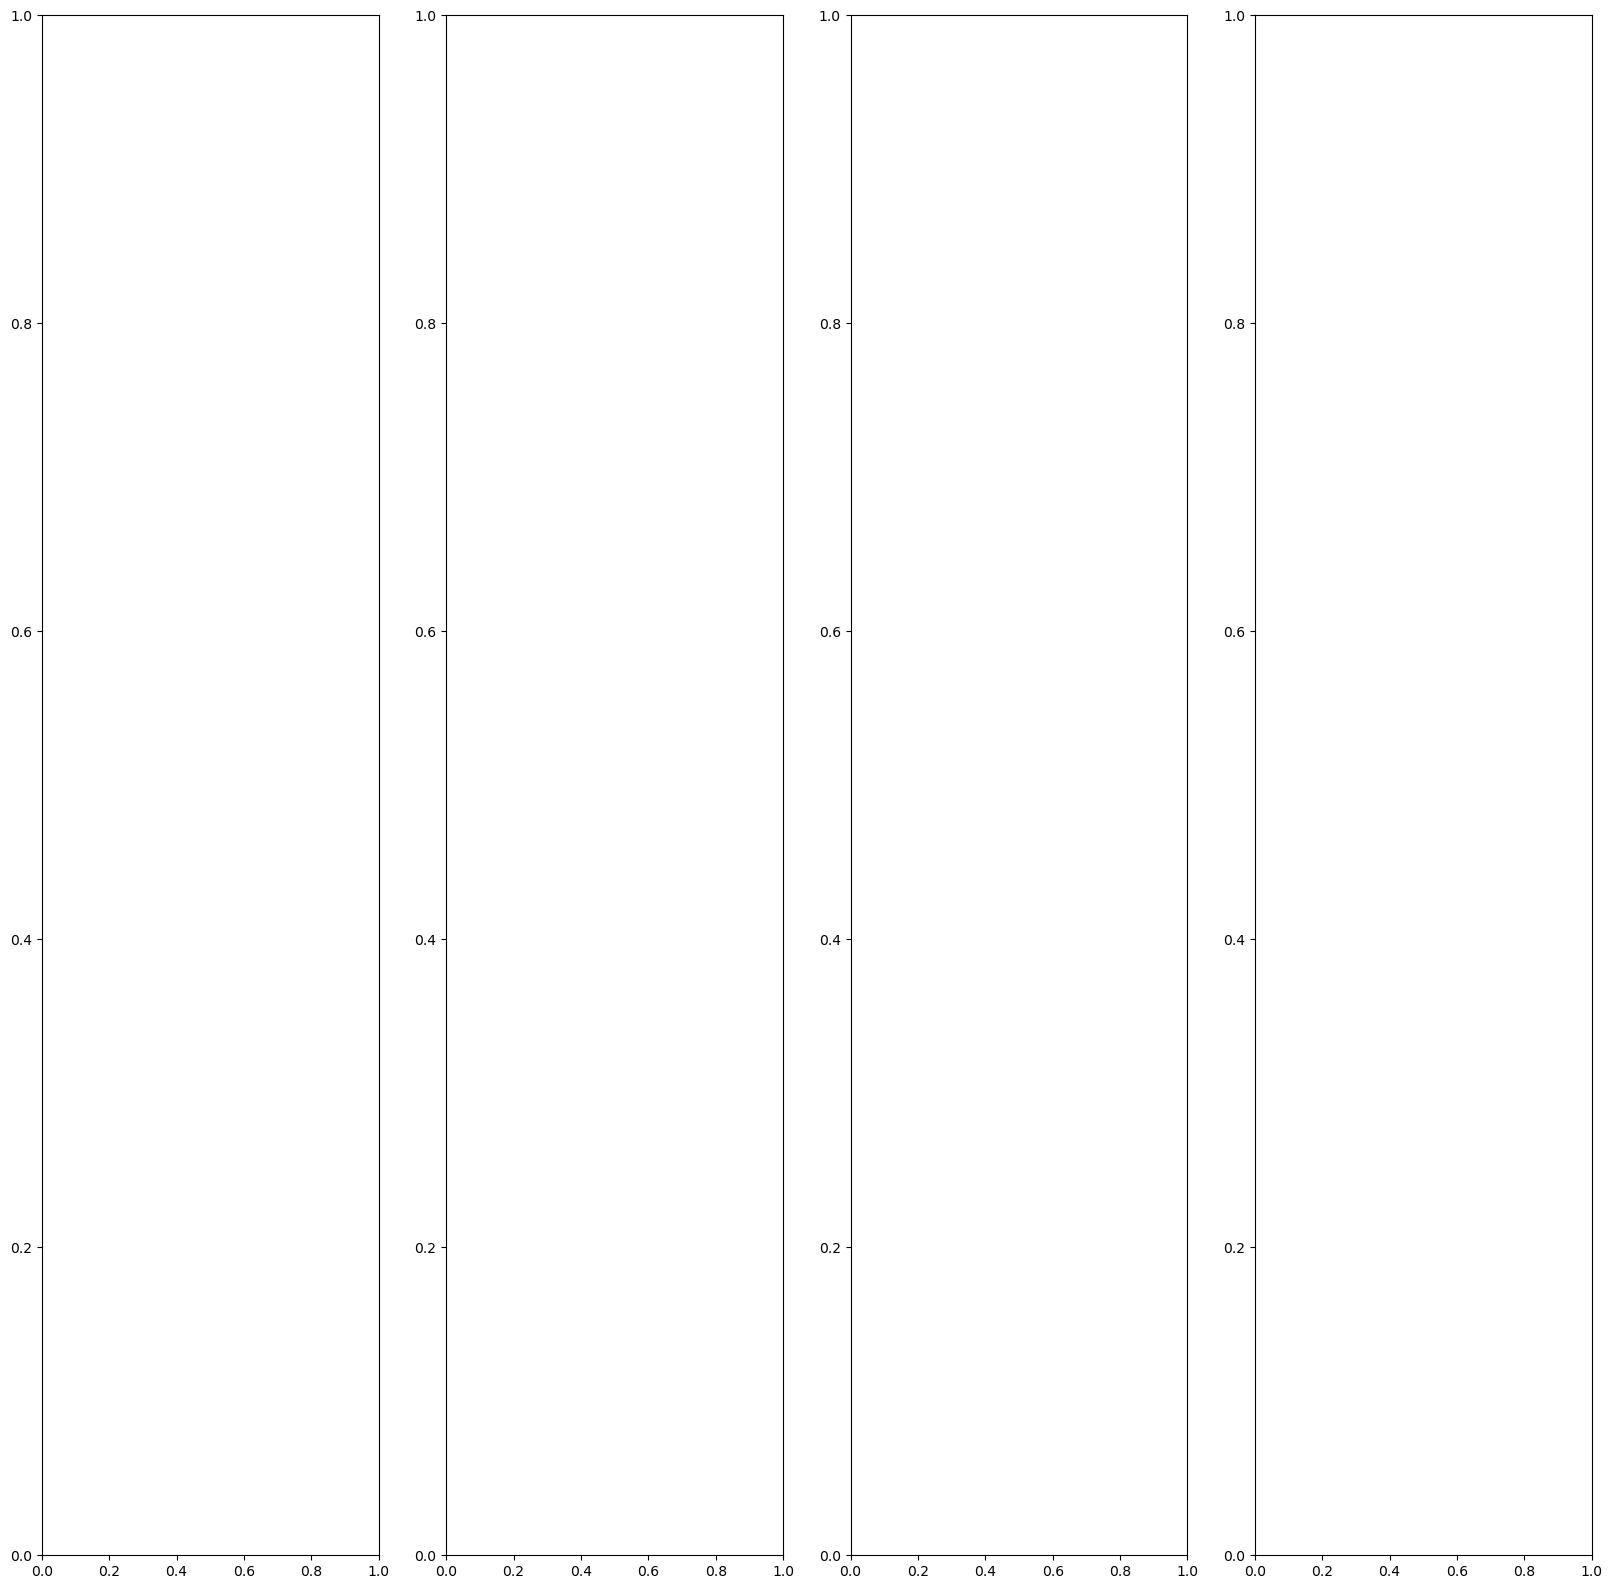

In [103]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [5]:
from tensorflow.keras.models import load_model

In [108]:
facetracker.save('facetracker.h5')

In [6]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


KeyboardInterrupt: 